# Scikit-HEP tools
* [Scikit-HEP project](https://scikit-hep.org) provides high-performance data analysis tools in Python
* Partially funded by NSF grants, community of ~100 people
* Core values
    * Non-monolithic approach: collection of specialized tools that connect well
    * Pythonic design
    * Easy installation
    * Good documentation
    * Reactive to community feedback
* Core packages
    * [uproot](https://github.com/scikit-hep/uproot): fast reading and writing of ROOT Trees
    * [boost-histogram](https://github.com/scikit-hep/boost-histogram): fast and flexible multi-dimensional histograms and profiles
    * [particle](https://github.com/scikit-hep/particle): get particle properties from PDG IDs
    * [iminuit](https://github.com/scikit-hep/iminuit): Python wrapper to MINUIT minimization and error computation package

**The power of combinatorics: build everything from basic components that fit together**
<img src="https://images.unsplash.com/photo-1578211952774-21325799c14d?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1350&q=80" width=50%/>

<img src="https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/source/logo-300px.png" width=20%/>

* uproot provides very fast, efficient, and convenient access to ROOT trees

[<img src="https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/logscales.png" width="70%"/>](https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/logscales.png)

<img src="https://raw.githubusercontent.com/scikit-hep/boost-histogram/develop/docs/_images/BoostHistogramPythonLogo.png" width=25%/>

* Python frontend to Boost.Histogram library in C++ from the Boost project
* No external dependency
* Very fast and feature-rich
* Beta-state, but super reliable implementation from production-ready C++ code from Boost
* Multi-dimensional histograms and profiles
* Supports weighted and unweighted data
* And much much more, see docs

<img src="https://raw.githubusercontent.com/scikit-hep/iminuit/develop/doc/_static/iminuit_logo.svg" width=25%/>

* Python frontend to MINUIT2 C++ library maintained at CERN
* Basically the only fitting tool used in HEP
* No external dependency apart from numpy
* Comes with builtin cost functions for common fits, see iminuit.cost

In [1]:
# !pip install uproot awkward
import uproot
f = uproot.open("example.root")
event = f["event"]
#help(event)

In [2]:
event.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
trk_len              | int32_t                  | AsDtype('>i4')
mc_trk_len           | int32_t                  | AsDtype('>i4')
trk_imc              | int32_t[]                | AsJagged(AsDtype('>i4'))
trk_px               | float[]                  | AsJagged(AsDtype('>f4'))
trk_py               | float[]                  | AsJagged(AsDtype('>f4'))
trk_pz               | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_px            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_py            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_pz            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_pid           | int32_t[]                | AsJagged(AsDtype('>i4'))


* mc_trk_len: number of true tracks in event
* mc_trk_px: x-component of true momentum of particle (variable-length array)
* mc_trk_py: y-component of true momentum of particle (variable-length array)
* mc_trk_pz: z-component of true momentum of particle (variable-length array)
* trk_len: number reconstructed tracks in event
* trk_px: x-component of momentum of reconstructed track (variable-length array)
* trk_py: y-component of momentum of reconstructed track (variable-length array)
* trk_pz: z-component of momentum of reconstructed track (variable-length array)
* trk_imc: index of matched true particle or -1 (variable-length array)

In [3]:
b = event["trk_len"]
#help(b)

In [4]:
# branches in trees are usually compressed
b.compressed_bytes, b.uncompressed_bytes

(935, 4000)

In [5]:
# get branches as arrays
arr = event.arrays(["trk_len", "trk_px", "mc_trk_len", "mc_trk_px"])

trk_len = arr["trk_len"]
trk_px = arr["trk_px"]
mc_trk_len = arr["mc_trk_len"]
mc_trk_px = arr["mc_trk_px"]

In [6]:
# tree is "two dimensional", first dimension iterates over events, second dimension iterates over tracks per event
# number of simulated particles generally differs from number of reconstructed particles

for ievent in range(5):
    print(ievent, trk_len[ievent], trk_px[ievent], mc_trk_len[ievent], mc_trk_px[ievent])

0 6 [-0.979, 0.232, -0.464, 0.629, 0.0287, 0.156] 4 [-0.594, 0.695, 0.241, -0.895]
1 7 [-0.59, 0.102, -0.282, -0.585, 0.0525, -0.249, -0.0836] 6 [-0.202, -0.698, -0.589, -0.23, 0.0268, 0.0523]
2 2 [0.124, 0.309] 1 [0.105]
3 6 [-0.287, 0.0082, -0.671, -0.933, -0.011, 0.0323] 3 [-0.361, -0.515, 0.0203]
4 7 [-0.086, -0.101, 0.0523, 0.204, -0.0287, 0.115, 0.0954] 4 [0.0694, -0.0777, -0.129, 0.14]


In [7]:
# first ten entries of trk_len
trk_len[:10]

<Array [6, 7, 2, 6, 7, 7, 6, 7, 4, 6] type='10 * int32'>

In [8]:
import numpy as np

np.sum(trk_len) # many numpy functions work on Array although it is not a numpy array

5032

In [9]:
f"{np.sum(trk_len == 0)} events with zero tracks"

'5 events with zero tracks'

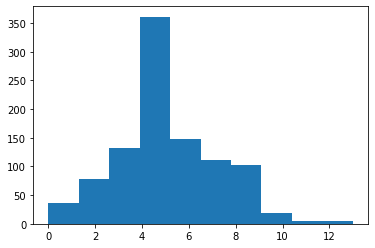

In [10]:
import matplotlib.pyplot as plt

plt.hist(trk_len);

In [11]:
# first ten entries of trk_px
trk_px[:10]

<Array [[-0.979, 0.232, ... 0.352, 0.72]] type='10 * var * float32'>

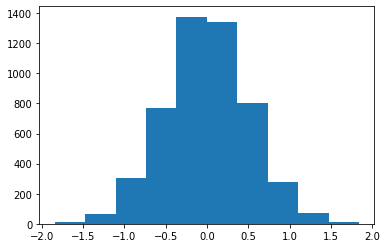

In [12]:
import awkward as ak # similar to numpy
plt.hist(ak.flatten(trk_px));

**Reading data from a large tree**

* tree often too large to load into memory all at once (tree size > 100 GB and more possible)
* two solutions
    * arrays
        * pro: simple, many array operations work, minimal typing
        * con: may produce very large arrays in memory
    * iterate over chunks (**recommended**)
        * pro: memory footprint under control
        * con: more typing to set up

In [13]:
# work with arrays
print(trk_len > 10)    # ok
print(trk_len + 1)     # ok
print(np.exp(trk_len)) # ok
print(np.sum(trk_len)) # ok
print(trk_len[2:5])    # ok

[False, False, False, False, False, False, ... False, False, False, False, False]
[7, 8, 3, 7, 8, 8, 7, 8, 5, 7, 2, 7, 8, ... 7, 9, 9, 5, 3, 5, 14, 4, 7, 4, 5, 7, 4]
[403, 1.1e+03, 7.39, 403, 1.1e+03, 1.1e+03, ... 20.1, 403, 20.1, 54.6, 403, 20.1]
5032
[2, 6, 7]


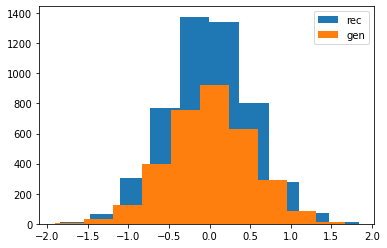

In [14]:
# use iterate
for trk_px, trk_imc, mc_trk_px in event.iterate(["trk_px", "trk_imc", "mc_trk_px"], how=tuple):

    plt.hist(ak.flatten(trk_px), label="rec")
    plt.hist(ak.flatten(mc_trk_px), label="gen")
    plt.legend()

    break

1.44 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


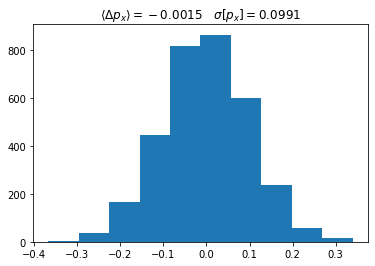

In [15]:
%%timeit -n 1 -r 1
# let's subtract reconstructed from true momentum (this is slow)

delta_px = []
for trk_px, trk_imc, mc_trk_px in event.iterate(["trk_px", "trk_imc", "mc_trk_px"], how=tuple):    
    for px, imc, mc_px in zip(trk_px, trk_imc, mc_trk_px):
        # select only tracks with associated true particle
        mask = imc >= 0
        px = px[mask]
        mc_px = mc_px[imc[mask]]
        delta = np.asarray(px - mc_px) # conversion to numpy needed
        delta_px = np.append(delta_px, delta)
        
plt.hist(delta_px)
plt.title(f"$\\langle\\Delta p_x\\rangle = {np.mean(delta_px):.4f} \quad \sigma[p_x] = {np.std(delta_px):.4f}$");

In [16]:
# let's accelerate this with numba
import numba as nb

/usr/local/lib/python3.8/site-packages/numba/core/dispatcher.py:238: UserWarning: Numba extension module 'awkward1._connect._numba' failed to load due to 'ImportError(generic_type: type "kernel_lib" is already registered!)'.
  entrypoints.init_all()


447 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


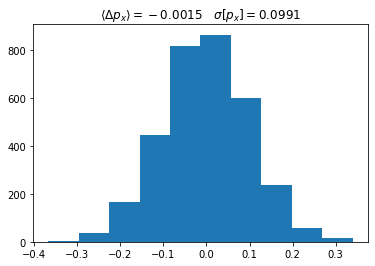

In [17]:
%%timeit -n 1 -r 1

@nb.njit
def calc(b, px_all, imc_all, mc_px_all):
    for px, imc, mc_px in zip(px_all, imc_all, mc_px_all):
        for pxi, imci in zip(px, imc):
            if imci < 0:
                continue
            mc_pxi = mc_px[imci]
            b.append(pxi - mc_pxi)

b = ak.ArrayBuilder() # must be constructed outside of numba-function
for trk_px, trk_imc, mc_trk_px in event.iterate(["trk_px", "trk_imc", "mc_trk_px"], how=tuple):    
    calc(b, trk_px, trk_imc, mc_trk_px)

delta_px = b.snapshot() # generates final array
plt.hist(delta_px)
plt.title(f"$\\langle\\Delta p_x\\rangle = {np.mean(delta_px):.4f} \quad \sigma[p_x] = {np.std(delta_px):.4f}$");

* created array `delta_px` could still become very large
* boost-histogram solves this: create histogram object once, fill iteratively

In [18]:
# let's do it again with boost-histogram
# !pip install boost-histogram
import boost_histogram as bh

xaxis = bh.axis.Regular(50, -2, 2)
h_px = bh.Histogram(xaxis)
h_mc_px = bh.Histogram(xaxis)
# let's use a finer binning for this one
h_delta_px = bh.Histogram(bh.axis.Regular(100, -2, 2))

In [19]:
%%timeit -n 1 -r 1

@nb.njit
def calc(b, px_all, imc_all, mc_px_all):
    for px, imc, mc_px in zip(px_all, imc_all, mc_px_all):
        for pxi, imci in zip(px, imc):
            if imci < 0:
                continue
            mc_pxi = mc_px[imci]
            b.append(pxi - mc_pxi)

for trk_px, trk_imc, mc_trk_px in event.iterate(["trk_px", "trk_imc", "mc_trk_px"], how=tuple):
    h_px.fill(ak.flatten(trk_px))
    h_mc_px.fill(ak.flatten(mc_trk_px))

    b = ak.ArrayBuilder() # must be constructed outside of numba-function
    calc(b, trk_px, trk_imc, mc_trk_px)
    h_delta_px.fill(b.snapshot())

163 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [20]:
#help(h_px)

In [21]:
print(h_px)

                   +---------------------------------------------------------+
[ -inf,    -2) 0   |                                                         |
[   -2, -1.92) 0   |                                                         |
[-1.92, -1.84) 1   |                                                         |
[-1.84, -1.76) 0   |                                                         |
[-1.76, -1.68) 0   |                                                         |
[-1.68,  -1.6) 3   |                                                         |
[ -1.6, -1.52) 3   |                                                         |
[-1.52, -1.44) 9   |=                                                        |
[-1.44, -1.36) 6   |=                                                        |
[-1.36, -1.28) 10  |==                                                       |
[-1.28,  -1.2) 14  |==                                                       |
[ -1.2, -1.12) 23  |====                            

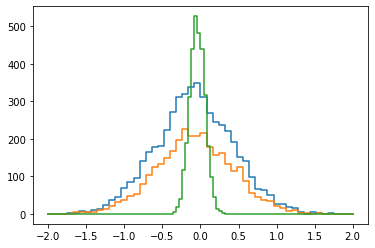

In [22]:
# matplotlib does not support plotting of histograms very well yet, this will change very soon with plt.stairs

for h in (h_px, h_mc_px, h_delta_px):
    w, xe = h.to_numpy()
    plt.step(xe, np.append(w, 0));

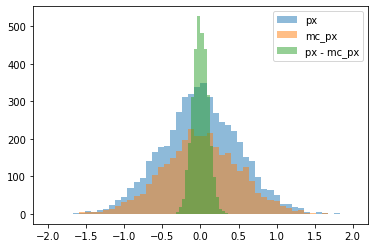

In [23]:
# !pip install pyik
from pyik.mplext import plot_hist

labels = ("px", "mc_px", "px - mc_px")
for i, h in enumerate((h_px, h_mc_px, h_delta_px)):
    w, xe = h.to_numpy()
    plot_hist(xe, w, facecolor=f"C{i}", label=labels[i], alpha=0.5)

plt.legend()

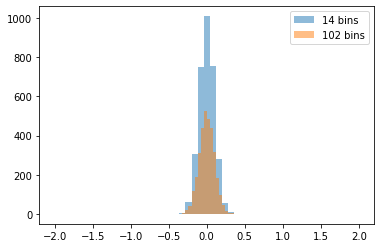

In [24]:
# make histogram coarser with `rebin` and shrink range `loc`, using an extended slicing syntax
from boost_histogram.tag import loc, rebin

h_delta_px_2 = h_delta_px[loc(-0.5):loc(0.5):rebin(2)]

for i, h in enumerate((h_delta_px_2, h_delta_px)):
    w, xe = h.to_numpy()
    plot_hist(xe, w, facecolor=f"C{i}", label=f"{h.size} bins", alpha=0.5)
plt.legend();

In [25]:
# you can make very powerful multi-dimensional histograms with boost-histogram and even profiles

px_axis = bh.axis.Regular(50, -2, 2)
pid_axis = bh.axis.IntCategory([], growth=True)
h_3d = bh.Histogram(px_axis, px_axis, pid_axis)

# compute mean of px in bins of mc_px
p_2d = bh.Histogram(px_axis, pid_axis, storage=bh.storage.Mean())

for trk_px, trk_imc, mc_trk_px, mc_trk_pid in event.iterate(
        ["trk_px", "trk_imc", "mc_trk_px", "mc_trk_pid"], how=tuple):

    for px, imc, mc_px, mc_pid in zip(trk_px, trk_imc, mc_trk_px, mc_trk_pid):
        # select only tracks with associated true particle
        mask = imc >= 0
        px = px[mask]
        associated = imc[mask]
        mc_px = mc_px[associated]
        mc_pid = mc_pid[associated]
        h_3d.fill(mc_px, px, mc_pid)
        p_2d.fill(mc_px, mc_pid, sample=px)

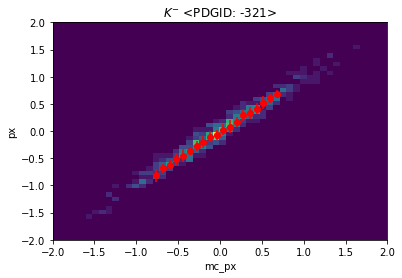

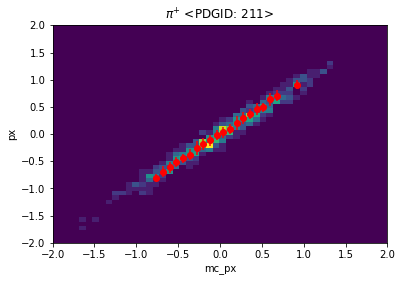

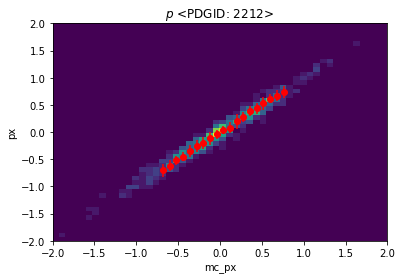

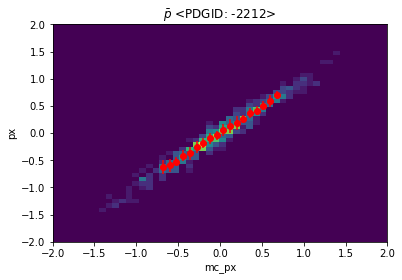

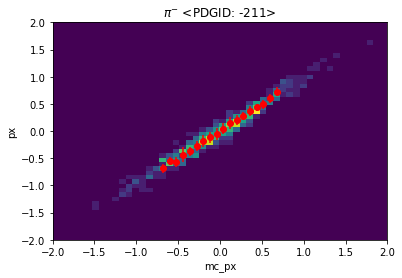

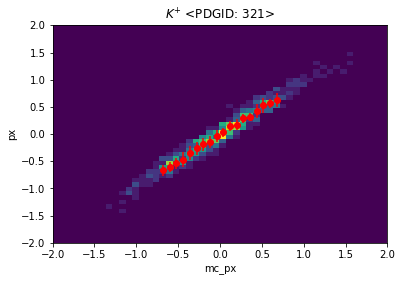

In [26]:
# !pip install particle
import particle

w, xe, ye, ze = h_3d.to_numpy()

w2 = p_2d.view() # get profile content as a numpy array
cx = p_2d.axes[0].centers

# IntCategory axis is special, so handling is a bit different
pids = h_3d.axes[2]
particles = [particle.Particle.from_pdgid(pid) for pid in pids]

for i, particle in enumerate(particles):
    plt.figure()
    plt.pcolormesh(xe, ye, w[..., i])
    # select profile bins with sufficient entries
    w2i = w2[:, i]
    mask = w2i.count > 10
    plt.errorbar(cx[mask], w2i[mask].value, w2i[mask].variance ** 0.5, fmt="or")
    plt.xlabel("mc_px")
    plt.ylabel("px")
    plt.title(f"${particle.latex_name}$ {particle.pdgid}")

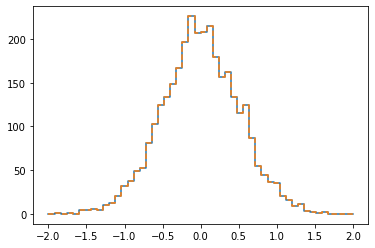

In [27]:
# high-dimensional histograms can be projected loss-lessly to lower-dimensional histograms

h = h_3d.project(0)

for i, h in enumerate((h_mc_px, h)):
    w, xe = h.to_numpy()
    plot_hist(xe, w, ls=("-", "--")[i])

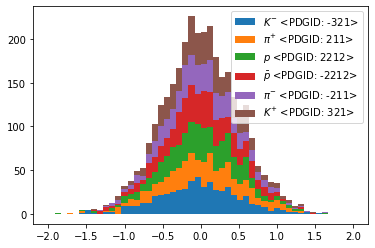

In [28]:
# let's make a stacked histogram to show the components from the individual pids

h_mc_px_3 = h_3d.project(0, 2)

w, xe, ye = h_mc_px_3.to_numpy()
wstack = 0
for i, particle in enumerate(particles):
    wstack += w[:, i]
    plot_hist(xe, wstack, facecolor=f"C{i}", label=f"${particle.latex_name}$ {particle.pdgid}", zorder=-i)

plt.legend();

**Fits**

* Typical analysis work flow (often automated with Snakemake)
    1. Pre-select data and make compact data trees
    2. Make histograms and profiles from tree data
    3. Fit histograms and profiles to extract physical parameters
* Many specialized fitting tools for individual purposes, e.g.:
    - [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit)
    - [RooFit](https://root.cern.ch/roofit)
* Generic method
    - Select mathematical model (pdf) which describes data
    - Use maximum-likelihood method to adapt model to data
* Specialized methods give fast results for some types of problems
* Generic method allows one to do advanced things not implemented in specialized methods

In [29]:
# !pip install iminuit
from iminuit import Minuit

Let's fit the px distribution with a normal distribution to extract the parameters $\mu$ and $\sigma$.

- To apply maximum-likelihood method, we need a statistical model that describes the data
- Assumption 1: original data before histogramming is normal distributed; pdf is $\mathcal{N}(\mu, \sigma)$ with parameters $\mu$ and $\sigma$
- Assumption 2: count in histogram cell is Poisson distributed $P(n_i, \lambda_i)$
- Expected content in a histogram cell is $\lambda_i = N \int_{x_i}^{x_{i+1}} \mathcal{N}(\mu, \sigma) \, \text{d}x$, where $N$ is total number of events
- Likelihood is joint probability of data under model
  $L = \prod_i P(n_i, \lambda_i)$, need to maximize this by varying model parameters $\mu$ and $\sigma$
- Technical step to achieve this: Minimize score $S(\mu,\sigma) = -2\ln L(\mu, \sigma) = -2\sum_i \ln P(n_i; \lambda_i)$

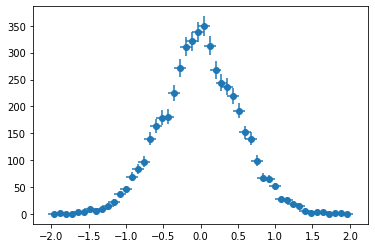

In [30]:
# scipy has many statistical distributions
from scipy.stats import norm, poisson

# get data from before
px_axis = h_px.axes[0]
cx = px_axis.centers
dx = px_axis.widths
xe = px_axis.edges
n = h_px.view()

plt.errorbar(cx, n, n ** 0.5, dx, fmt="o", label="data");

In [31]:
n_total = np.sum(n)

def score(mu, sigma):
    cdf = norm(mu, sigma).cdf
    lambdas = n_total * np.diff(cdf(xe))
    probs = poisson.pmf(n, lambdas)
    return -2 * np.sum(np.log(probs + 1e-100)) # avoid taking log of zero

score.errordef = Minuit.LIKELIHOOD

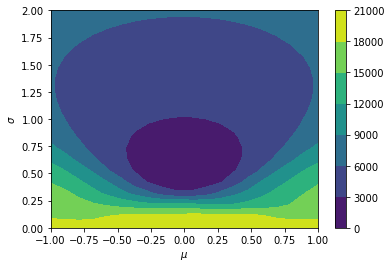

In [32]:
from matplotlib.ticker import LogLocator

mus = np.linspace(-1, 1, 20)
sigmas = np.linspace(1e-10, 2, 20)

g_mu, g_sigma = np.meshgrid(mus, sigmas)
g_score = np.vectorize(score)(g_mu, g_sigma)

plt.contourf(g_mu, g_sigma, g_score)
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.colorbar();

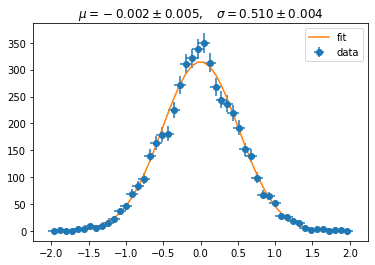

In [33]:
m = Minuit(score, mu=0, sigma=1)
m.limits["sigma"] = (0, None)
m.migrad()

mu, sigma = m.values
s_mu, s_sigma = m.errors

plt.errorbar(cx, n, n ** 0.5, dx, fmt="o", label="data");
plt.plot(cx, norm(mu, sigma).pdf(cx) * n_total * dx, label="fit")
plt.title(f"$\mu = {mu:.3f} \pm {s_mu:.3f}, \quad \sigma = {sigma:.3f} \pm {s_sigma:.3f}$")
plt.legend();

Check whether the fit is good:
- by looking at *pull distribution*
    - $(n_i - \lambda_i) / \lambda_i$ for Poisson distribute data
- by checking the $\chi^2$ value against the degrees of freedom
    - Simple check: $\chi^2/n_\text{dof}$ should be about 1
    - Better check: chance probability $\int_{\chi^2_\text{observed}}^{-\infty} P(\chi^2; n_\text{dof}) \, \text{d}\chi^2$ to obtain a higher value than the observed should not be too small


chi2/ndof = 49.418000396625736 / 48 = 1.0295416749297028
0.4163398356042557


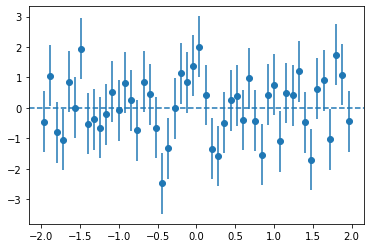

In [34]:
cdf = norm(mu, sigma).cdf

n_pred = (cdf(xe[1:]) - cdf(xe[:-1])) * n_total
n_sigma = n_pred ** 0.5 # for Poisson-distributed data

pull = (n - n_pred) / n_sigma

plt.errorbar(cx, pull, np.ones_like(pull), fmt="o")
plt.axhline(0, ls="--")

# degrees of freedom: number of fitted bins minus number of fitted parameters
n_dof = len(n) - 2 # need to subtract two fitted parameters

chi2_obs = np.sum(pull ** 2)

print(f"chi2/ndof = {chi2_obs} / {n_dof} = {chi2_obs / n_dof}")

from scipy.stats import chi2

chance_prob = 1 - chi2(n_dof).cdf(chi2_obs)

print(f"{chance_prob}")